In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("input/data-salary.txt")
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [3]:
res_lm = smf.ols("Y ~ X", data=df).fit()

In [4]:
res_lm.params

Intercept   -119.697132
X             21.904201
dtype: float64

In [5]:
new_df = pd.DataFrame([i for i in range(23, 61)], columns=["X"])
pred = res_lm.get_prediction(new_df)
pred_summary95 = pred.summary_frame(alpha=0.05)
pred_summary50 = pred.summary_frame(alpha=0.50)

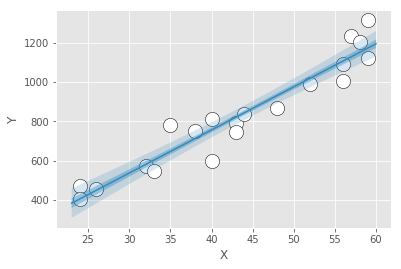

In [6]:
plt.scatter(df["X"],  df["Y"], s=200, color="white", edgecolors="black")
plt.fill_between(new_df["X"], pred_summary95["mean_ci_lower"], pred_summary95["mean_ci_upper"], facecolor="C1", alpha=0.2)
plt.fill_between(new_df["X"], pred_summary50["mean_ci_lower"], pred_summary50["mean_ci_upper"], facecolor="C1", alpha=0.4)
plt.plot(new_df["X"], pred.predicted_mean, color="C1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

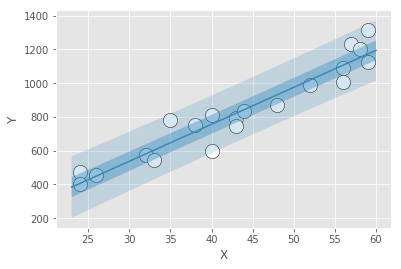

In [7]:
plt.scatter(df["X"],  df["Y"], s=200, color="white", edgecolors="black")
plt.fill_between(new_df["X"], pred_summary95["obs_ci_lower"], pred_summary95["obs_ci_upper"], facecolor="C1", alpha=0.2)
plt.fill_between(new_df["X"], pred_summary50["obs_ci_lower"], pred_summary50["obs_ci_upper"], facecolor="C1", alpha=0.4)
plt.plot(new_df["X"], pred.predicted_mean, color="C1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()